# Archivo para limpieza de datos

## Análisis previo a la limpieza

El proceso que seguimos para seleccionar las variables que utilizaremos y el proceso de limpieza como tal, consistió en considerar solamente los datos que nos proporcionen algún tipo de información valiosa relacionada con la tendencia a sobrevivir dentro del contexto del hundimiento del Titanic. Y para lograr dicha tarea, en primera instancia tuvimos que plantear las situaciones y hechos que se suscitaron en el barco, tal es el caso de que tanto mujeres como niños tienen más probabilidades de haber sobrevivido debido a que había una prioridad por salvar a esta población antes que a los hombres. Otro ejemplo, es que las personas que poseían mejor estatus socioeconómico tenían más posibilidades de haber sobrevivido al desastre, esto por su gran influencia e importancia sobre los demás tripulantes. Utilizando este razonamiento y lógica, es como buscamos realizar el análisis a cada una de las variables que presentaremos a lo largo de este documento.

### Herramientas utilizadas: 

* Python
    * Pandas
    * Mathplotlib
### Selección de Atributos
#### Atributos útiles

* **Survived**: Este valor es indispensable debido a que nos proporciona la información necesaria para realizar análisis como correlaciones o censos

* **PClass**: Existe la creencia de que las primeras clases gozaron de lujos y prioridad para el abordaje de los botes salvavidas, en adición a esto, las cabinas correspondientes a las clases más altas se encontraban más cerca de la cubierta del barco, facilitando la evacuación, a diferencia de las clases más bajas. Por esto consideramos que es un factor importante a considerar.

* **Sex**: El sexo del pasajero se trató de uno de los principales discriminantes al momento de decidir el abordaje de los barcos salvavidas, incrementando considerablemente las probabilidades de sobrevivir al undimiento del barco, por lo que consideramos a este dato como un importante factor dentro de los datos de entrenamiento. Es muy probable que este dato sea traducido a un dato numérico o booleano, tanto para simplicidad como para posteriormente elaborar operaciones con dicho dato.

* **Age**: Al igual que el sexo, la edad del pasajero fue uno de los factores determinantes para decidir la prioridad que tenía un pasajero de subir a los botes salvavidas, por lo que consideramos que dejarlo como parte de los datos de entrenamiento sumamente importante.

* **SibSp**: Teníamos nuestras dudas con respecto a este atributo debido a que no estábamos seguros de sí este factor influye potencialmente dentro del contexto de sobrevivientes del Titanic, inclusive llegamos a creer que podía tratarse de un valor sin relevancia o repetido. Sin embargo, entre más re buscamos y analizamos la situación, llegamos a la conclusión de que probablemente el hecho de que un pasajero tenga varios familiares en el barco, podía influir de cierta manera en el factor de supervivencia. Para verificar esta hipótesis, decidimos realizar una gráfica *(Fig. 1)* en la cual vaciamos los datos de los supervivientes en conjunto con los datos de las personas que tenían hermanos y/o esposas. Los resultados fueron bastante reveladores, debido a que estas gráficas demostraban una tendencia que consiste en que, entre más familiares cercanos poseían, estas no tendían a sobrevivir, y viceversa. 

* **Parch**: La situación con este atributo es muy similar a “SibSp”, el hecho de que una persona haya estado acompañada por familiares cercanos puede ser un factor bastante influyente para su supervivencia. De igual manera teníamos nuestras dudas acerca de este atributo, sin embargo, realizamos una comparación gráfica *(Fig. 2)* entre los datos de las personas que tenían padres/hijos/hijas en el barco en conjunto con las personas que sobrevivieron, de igual forma vimos una tendencia muy clara de que las personas con más padres e hijos tendían a no sobrevivir y viceversa.

* **Fare**: La columna de fare nos muestra el precio que cada quien pagó por su boleto. Decidimos incluir esta columna porque sabemos que los pasajeros que estaban en las clases altas tenían cabina más cercanas a la parte superior del barco así que estaban más cerca de los barcos salvavidas y tenían mejores posibilidades de conseguir uno que los que estaban en las cabinas bajas. Dentro de las cabinas de clases altas inferimos que entre más pagaron mejor era su posición social y era más probable que tuvieran un tratamiento preferencial.

#### Atributos transformados
Las variables que se tomaron en cuenta para el análisis pero se transformaron o usaron para inferir valores de otras variables que, por ejemplo, cuentan con valores nulos.
* **Cabin**: Si bien consideramos que el número de cabina del pasajero por sí solo no es indicativo de sus posibilidades de supervivencia, creemos que el hecho de que un pasajero tuviera una cabina asignada puede ser un indicador valioso al tomar en cuenta un par de factores. 
    1. Que un pasajero tenga una cabina privada es indicador de parece ser indicador de clases más altas, siendo que la mayoría de cabinas privadas estaban ocupadas por miembros de primera clase, lo cual ya describimos, consideramos un indicador fuerte de supervivencia. 
    2. Esto pudo representar una mayor facilidad para escapar hacía la cubierta del barco, sugiriendo mayores posibilidades de escapar.

Por estas razones decidimos crear una nueva columna llamada 'Has_Cabin', para tomar en cuenta estos factores.

#### Atributos inutiles
En cuanto a las variables que no tomamos en cuenta para el análisis son:

* **PassengerId**: El dato de los identificadores no fue considerado debido a que a pesar de ser un valor útil para identificar y diferenciar a un pasajero en específico del resto, en realidad no nos es útil para el contexto del entrenamiento, ya que no nos dice nada ni posee alguna relación con respecto a la supervivencia de los pasajeros.

* **Ticket**: Los tickets en realidad no nos dan ninguna información que nos ayude a predecir la probabilidad de sobrevivir ya que solamente es un conjunto de números y letras aleatorios. 

* **Embarked**: Decidimos no incluir este dato ya que en realidad solo lo podríamos utilizar para determinar la clase social de los pasajeros y ya tenemos mejores maneras de determinar esta información utilizando su clase de boleto y el precio que pagaron por su boleto.

* **Name**: El nombre de los pasajeros no es un dato relevante para este contexto debido a que no nos proporciona nada de información útil que pueda influenciar en la supervivencia de los pasajeros. El hecho de que alguna de las personas se llame de alguna forma o tenga cierto apellido no lo exenta de haber sobrevivido o no.

### Oportunidades de mejora / Trabajo futuro
Un punto de riesgo que encontramos es que existen muchas entradas que contienen valores nulos en la columna de edades. La solución que nosotros ideamos a esto es agregar la mediana de la columna de edades a todas las entradas que estuvieran vacías, pero esto también puede causar problemas en el futuro, ya que la edad es uno de los mayores factores que determina si una persona va a sobrevivir o no. Para resolver esto decidimos que podemos crear grupos con base en el título presente en el nombre de la persona (Mr., Mrs. Miss y Master) y con base en ese título calcular la mediana para cada grupo de edad y evitar el sesgado de los datos.



## Limpieza de datos

### Importación de dependencias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Lectura del archivo de entrenamiento

In [2]:
df = pd.read_csv('train.csv')

### Creación del atributo 'HasCabin'

In [3]:
# Create 'HasCabin' attribute
df['HasCabin'] = df['Cabin'].notnull()

### Transformación de valores nulos de edad por mediana

In [4]:
# Count the number of null values in the "Age" column
null_age_count = df['Age'].isnull().sum() # 177

# Replace null Age values with the median of all ages
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

### Borrado de columnas inutiles

In [5]:
# Delete 'useless' columns
data = df.drop(columns=["PassengerId", "Name", "Ticket", "Embarked", "Cabin"], axis=1)

## Gráficas

### Supervivientes por número de hermanos / cónyuges 

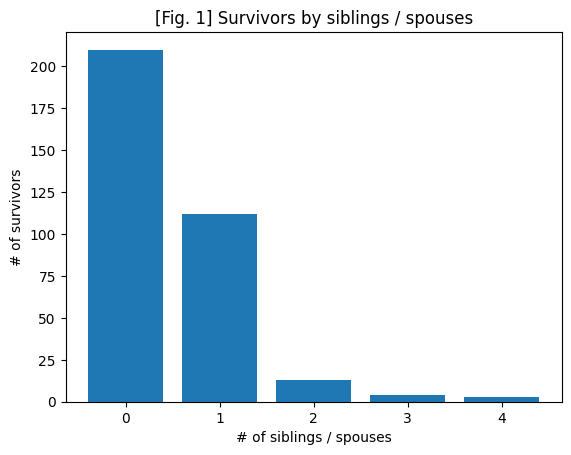

In [6]:
# Filter only survivors
survivors = data[data['Survived'] == 1]

# Group by the number of sibling / spouses and count occurrences
sibspo_count = survivors.groupby('SibSp').size().reset_index(name='Count')

# Plot the data
plt.bar(sibspo_count['SibSp'], sibspo_count['Count'])
plt.xlabel('# of siblings / spouses')
plt.ylabel('# of survivors')
plt.title('[Fig. 1] Survivors by siblings / spouses')
plt.show()

### Supervivientes por número de padres / hijos 

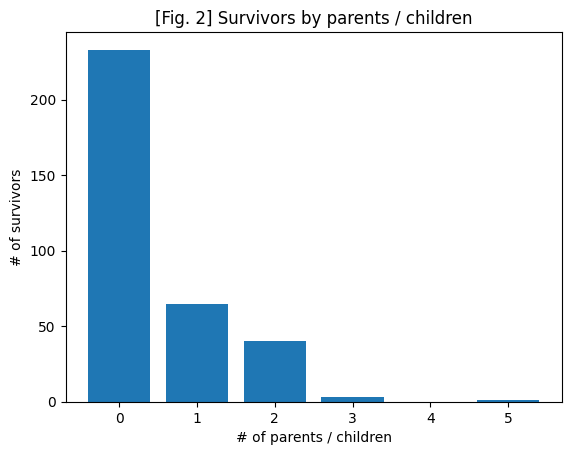

In [7]:
# Group by the number of parents / children and count occurrences
parchi_count = survivors.groupby('Parch').size().reset_index(name='Count')

# Plot the data
plt.bar(parchi_count['Parch'], parchi_count['Count'])
plt.xlabel('# of parents / children')
plt.ylabel('# of survivors')
plt.title('[Fig. 2] Survivors by parents / children')
plt.show()

### Supervivientes por posesión de cabina 

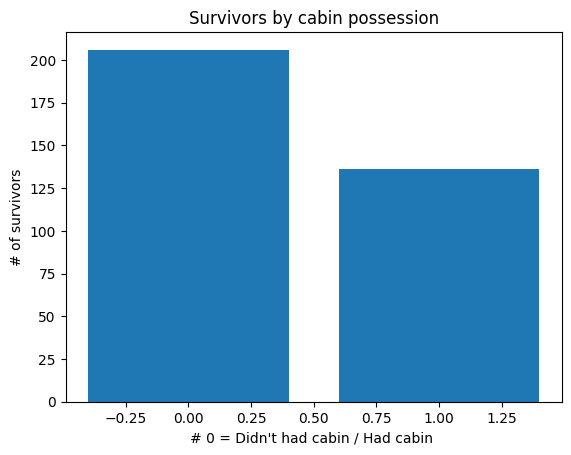

In [8]:
# Group by the Has_Cabin value and count occurrences
has_cabin_count = survivors.groupby('HasCabin').size().reset_index(name='Count')

# Plot the data
plt.bar(has_cabin_count['HasCabin'], has_cabin_count['Count'])
plt.xlabel("# 0 = Didn't had cabin / Had cabin ")
plt.ylabel('# of survivors')
plt.title('Survivors by cabin possession')
plt.show()

## Exportación de los datos a .csv

In [9]:
data.to_csv('train_clean.csv')